<a href="https://colab.research.google.com/github/phantom-balance/TEP/blob/master/TEP_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/phantom-balance/TEP.git
%cd TEP

Cloning into 'TEP'...
remote: Enumerating objects: 776, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 776 (delta 13), reused 22 (delta 12), pack-reused 753
Receiving objects: 100% (776/776), 100.51 MiB | 11.90 MiB/s, done.
Resolving deltas: 100% (377/377), done.
Checking out files: 100% (147/147), done.
/content/TEP


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from PCA_limit import PCA

In [9]:
Type = [0]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q))+"with reduced dimension "+str(reduced_dim))


UCL_T2=13.865531890687725 UCL_Q=59.03981803243803with reduced dimension 7


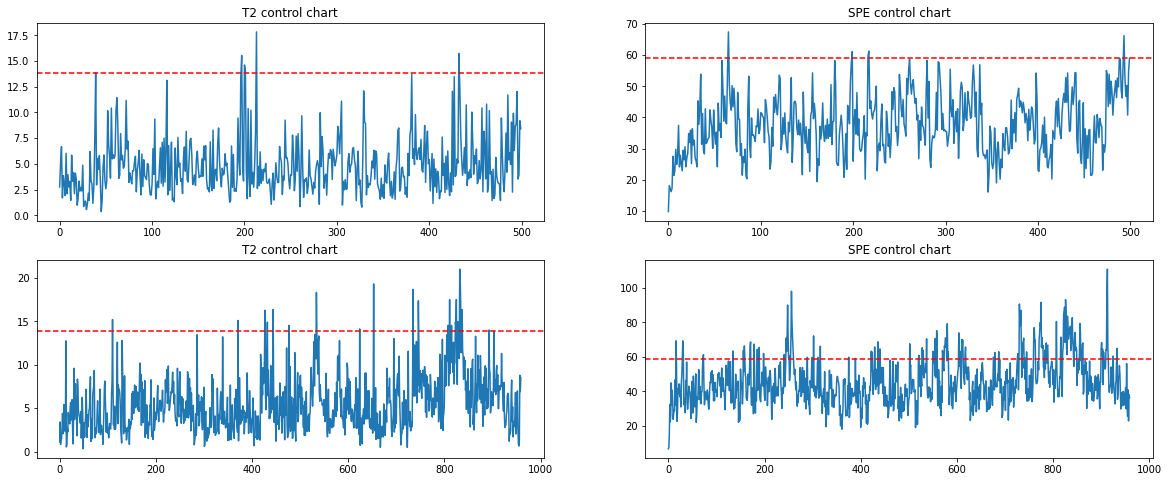

In [15]:
# T2 control chart and Q control chart for NOC
fig, ax = plt.subplots(2*len(Type), 2, figsize=(20, 8))

for i,(train, test) in enumerate(Data_list):
  ax[i,0].plot(train.numpy())
  ax[i,0].axhline(UCL_T2, color='r', ls='--')
  ax[i,0].set_title('T2 control chart')
  ax[i,1].plot(test.numpy())
  ax[i,1].axhline(UCL_Q, color='r', ls='--')
  ax[i,1].set_title('SPE control chart')


In [17]:
Type = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q))+"with reduced dimension"+str(int(reduced_dim)) )

UCL_T2=13.865531890687725 UCL_Q=59.03981803243803with reduced dimension7


In [26]:
k=[*range(1,50)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


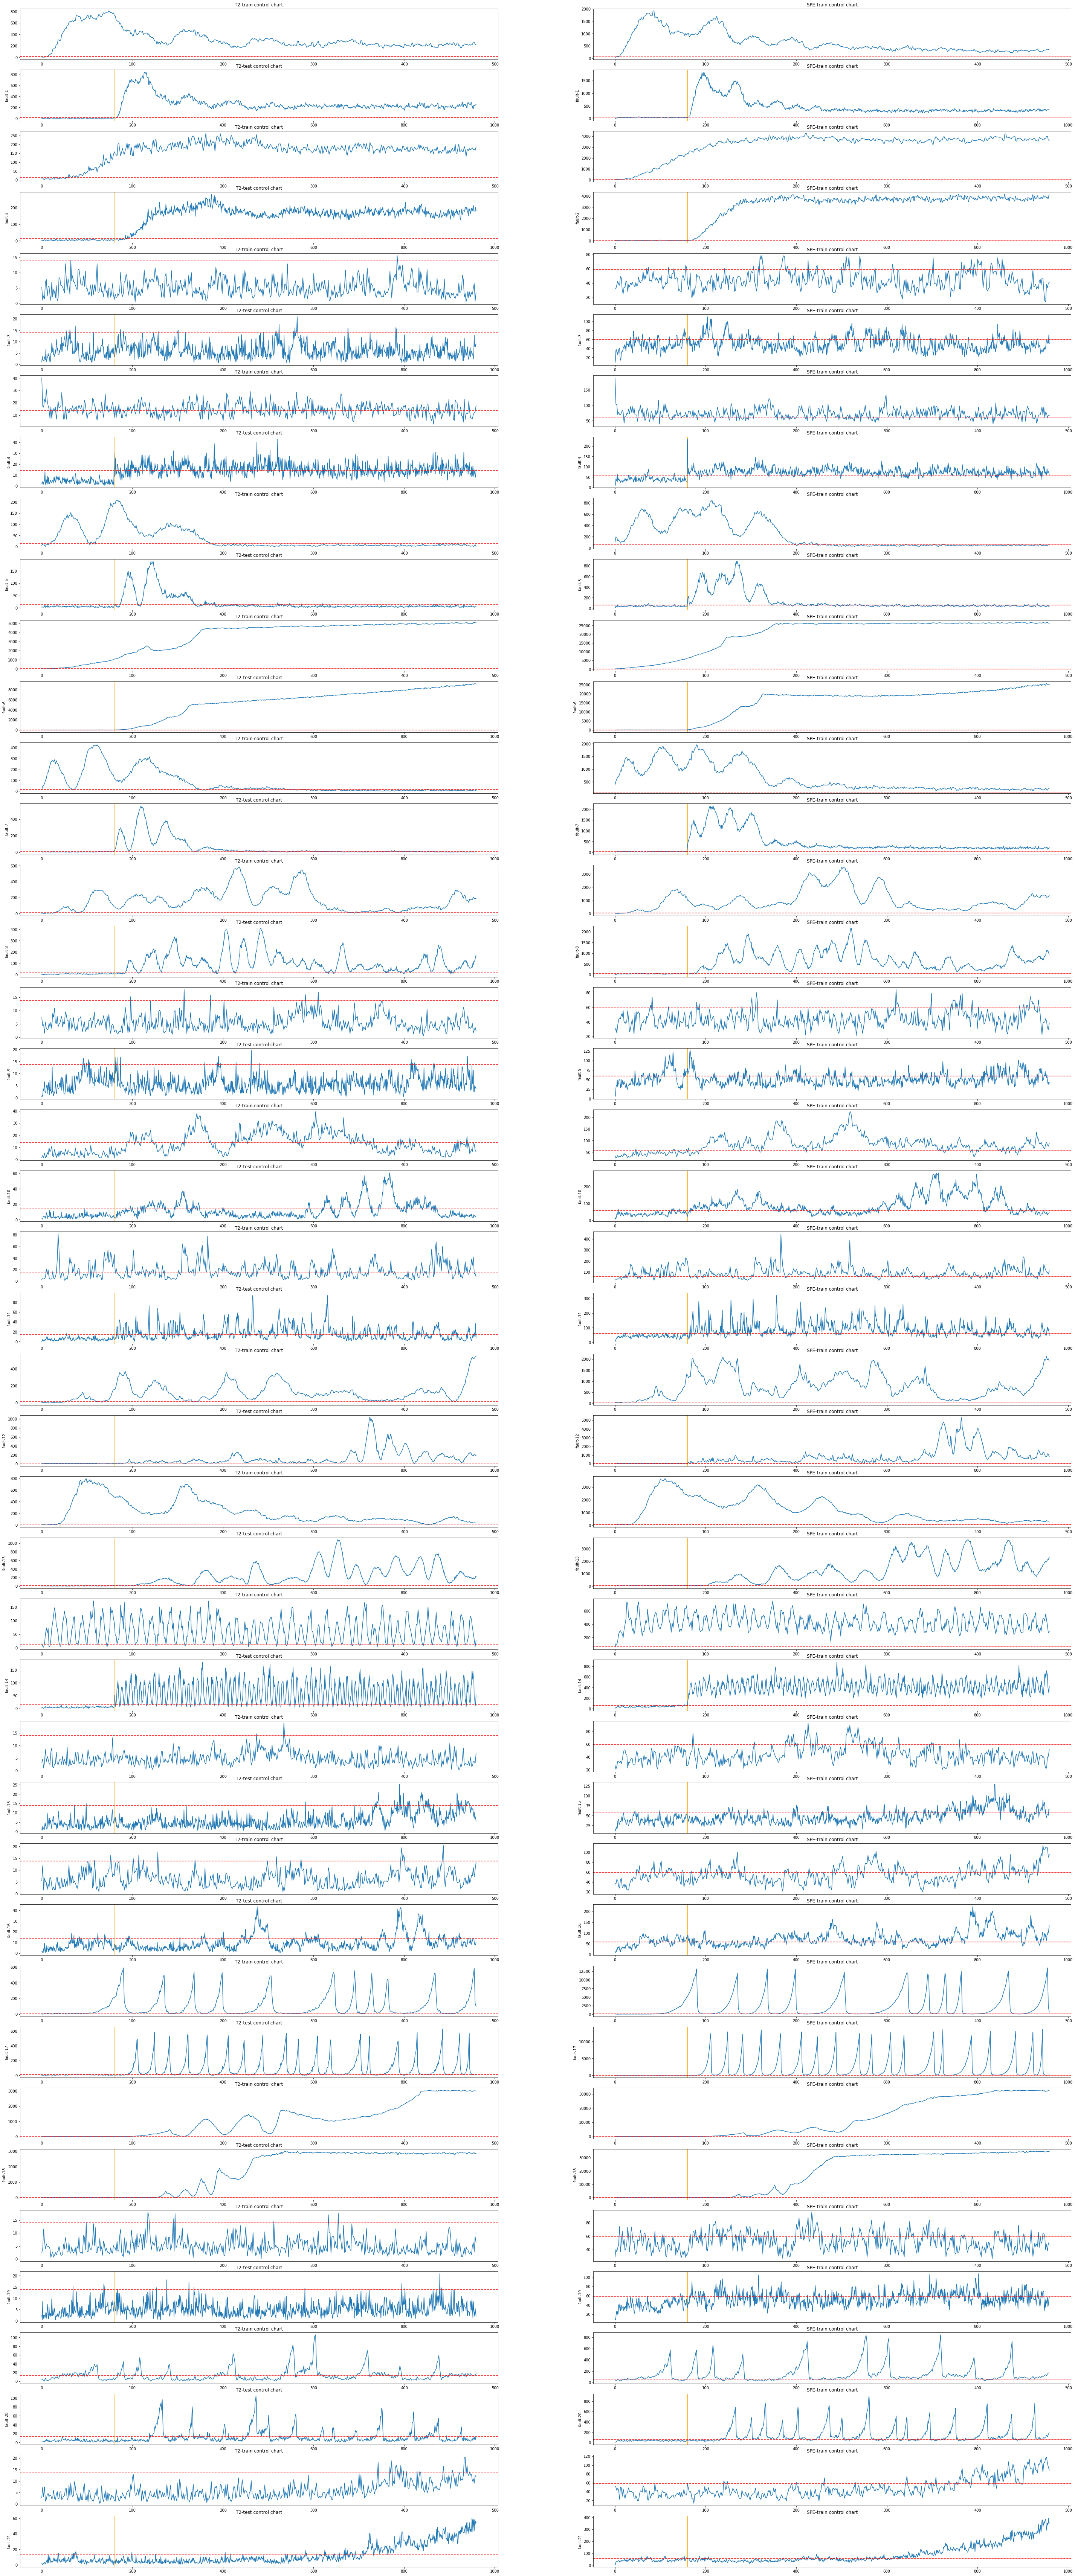

In [31]:
# T2 control chart and Q control chart for different faults
fig, ax = plt.subplots(2*len(Type), 2, figsize=(50, 125))
for i,(train, test) in enumerate(Data_list):

  ax[i,0].plot(train.numpy())
  ax[i,0].axhline(UCL_T2, color='r', ls='--')
  ax[i,0].set_title(f'T2-train control chart')
  if i % 2 != 0:
    ax[i,0].set_ylabel(f'fault-{int(k[i]/2)}')
    ax[i,0].set_title('T2-test control chart')
    ax[i,1].set_ylabel(f'fault-{int(k[i]/2)}')
    ax[i,1].set_title('SPE-test control chart')
    ax[i,0].axvline(160, color='orange')
    ax[i,1].axvline(160, color='orange')
  ax[i,1].plot(test.numpy())
  ax[i,1].axhline(UCL_Q, color='r', ls='--')
  ax[i,1].set_title('SPE-train control chart')